# Esame 10/01/22
## Parte 1

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

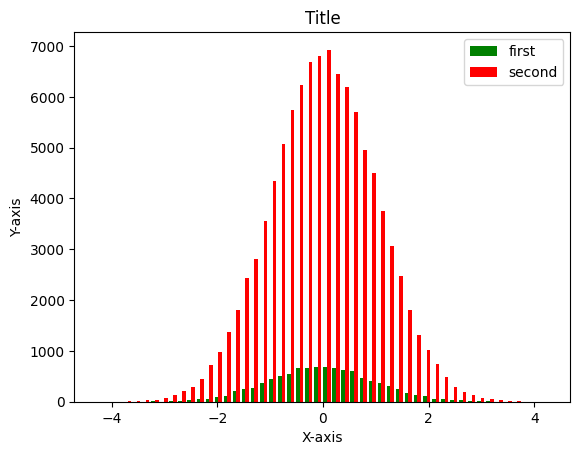

In [2]:
plt.hist([np.random.randn(10000),np.random.randn(100000)], bins=50,color=['g','r'],label=['first','second'])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Title")
plt.legend()

# 1.1
Quante sono le istanze contenute nel dataset? *17998* Il dataset è completo (cioè per ogni istanza tutti i valori di ogni attributo sono sempre correttamente specificati – non esistono “missing values”)? *Falso* Il dataset è bilanciato per quanto riguarda la classe da predire? *No*

In [3]:
df = pd.read_csv("Data/training_set_fd.csv",sep=';')
df

,claim_number,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,38301,1,1,Rent,Friday,Local,1,Broker,7530.940993,9.0,Compact,12885.452350,white,16161.33381,0
1,3,21,F,0.0,30445,0,1,Rent,Thursday,Highway,1,Online,2966.024895,4.0,Large,29429.452180,white,28691.96422,0
2,4,49,F,0.0,38923,0,1,Own,Tuesday,Local,0,Broker,6283.888333,3.0,Compact,21701.181950,white,22090.94758,1
3,5,58,F,1.0,40605,1,0,Own,Thursday,Local,3,Broker,6169.747994,4.0,Medium,13198.273440,other,38329.58106,1
4,6,38,M,1.0,36380,1,0,Rent,Tuesday,Highway,0,Broker,4541.387150,7.0,Medium,38060.211220,gray,25876.56319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,29993,69,M,1.0,42338,1,0,Own,Saturday,Local,0,Broker,4806.841803,6.0,Medium,32144.571850,black,16868.53410,0
17994,29996,35,F,0.0,35579,1,1,Own,Monday,Local,1,Phone,4089.794471,3.0,Medium,9468.510601,blue,31500.99689,1
17995,29997,27,F,1.0,32953,0,1,Rent,Saturday,Local,2,Online,2225.803056,5.0,Medium,64974.369590,black,44536.25506,0
17996,29999,52,F,1.0,39519,1,0,Own,Friday,Highway,1,Broker,9560.744844,3.0,Compact,24983.268110,white,50093.75959,0


In [4]:
df.isna().sum()

claim_number           0
age_of_driver          0
gender                 0
marital_status         5
annual_income          0
high_education_ind     0
address_change_ind     0
living_status          0
claim_day_of_week      0
accident_site          0
past_num_of_claims     0
channel                0
claim_est_payout      17
age_of_vehicle         8
vehicle_category       0
vehicle_price          0
vehicle_color          0
vehicle_weight         0
fraud                  0
dtype: int64

In [5]:
y = df.fraud
y

0        0
1        0
2        1
3        1
4        0
        ..
17993    0
17994    1
17995    0
17996    0
17997    0
Name: fraud, Length: 17998, dtype: int64

In [6]:
for i in range(2):
    where = np.where(df.fraud == i)
    lung = len(where[0])
    print("lunghezza di "+ str(i) +" : ",lung)

lunghezza di 0 :  15182
lunghezza di 1 :  2816


In [7]:
df.groupby("fraud")["claim_number"].count()

fraud
0    15182
1     2816
Name: claim_number, dtype: int64

## 1.2
Analizzare la variabile che indica l’età del guidatore, e considerare solo i guidatori con età inferiore a 91 anni. Rappresentare con un istogramma la distribuzione dei valori. Raggruppare poi le età in gruppi, in questo modo: gruppo1 18-21; gruppo 2 22-25; gruppo3 26-30; gruppo 4 41-40; gruppo 5 41-50; gruppo 6 51-90, visualizzare la distribuzione delle età nei gruppi e indicare la percentuale di frodi nel gruppo

In [8]:
df_age = df.copy()
df_age = df_age.loc[df.age_of_driver < 91]
ages = df_age.age_of_driver
ages

0        46
1        21
2        49
3        58
4        38
         ..
17993    69
17994    35
17995    27
17996    52
17997    61
Name: age_of_driver, Length: 17972, dtype: int64

<Axes: >

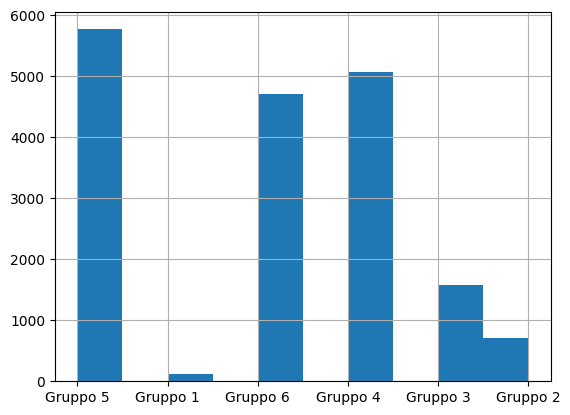

In [9]:
# è necessario fare un bin
bins = [18, 21, 25, 30, 40, 50,90]
group_names = ["Gruppo 1","Gruppo 2","Gruppo 3", "Gruppo 4","Gruppo 5","Gruppo 6"]
cats = pd.cut(ages,bins,labels=group_names)

cats.hist()

In [10]:
df_age['age_of_driver'] = cats
age_fraud = df_age.loc[df_age.fraud == 1]
age_fraud.groupby("age_of_driver")["gender"].count()/df_age.groupby("age_of_driver")["gender"].count()

age_of_driver
Gruppo 1    0.224000
Gruppo 2    0.142458
Gruppo 3    0.156566
Gruppo 4    0.170419
Gruppo 5    0.194348
Gruppo 6    0.095289
Name: gender, dtype: float64

## 1.3
Considerare il dataset originale e considerare la divisione in uomini e donne, e all’interno di
ogni gruppo la divisione in under o over 40 (si includano anche le persone con quaranta anni in
questo gruppo). Indicare a quale gruppo occorre fare maggiore attenzione perché è più facile
avere una frode all’interno di esso (motivare la decisione)

In [11]:
new_df = df.copy()
new_df['age_of_driver'] = np.where(new_df['age_of_driver'] < 40, "under40", "over40")
new_df_fraud = new_df.loc[new_df.fraud == 1]
new_df_fraud.groupby(["gender","age_of_driver"])["gender"].count()

gender  age_of_driver
F       over40           895
        under40          597
M       over40           798
        under40          526
Name: gender, dtype: int64

In [12]:
new_df_fraud.groupby(["gender","age_of_driver"])["gender"].count() / new_df.groupby(["gender", "age_of_driver"])["gender"].count()

gender  age_of_driver
F       over40           0.170055
        under40          0.179765
M       over40           0.135830
        under40          0.148630
Name: gender, dtype: float64

## 1.4
Verificare con un opportuno diagramma se è vero che la distribuzione delle frodi aumenta
all’aumentare del pagamento richiesto per l’indennizzo (attributo claim_est_payout)

<Axes: >

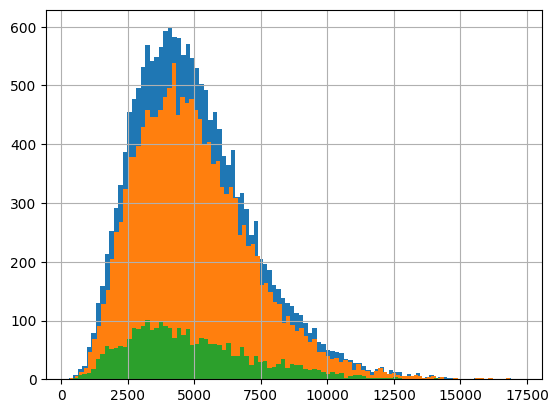

In [13]:
new_df = df.copy()
datas = []
datas.append(new_df["claim_est_payout"])
new_df["claim_est_payout"].hist(bins=100)
new_df_no_fraud = new_df.loc[new_df.fraud == 0]
datas.append(new_df_no_fraud["claim_est_payout"])
new_df_no_fraud['claim_est_payout'].hist(bins=100)
new_df_fraud = new_df.loc[new_df.fraud == 1]
datas.append(new_df_fraud["claim_est_payout"])
new_df_fraud['claim_est_payout'].hist(bins=100)

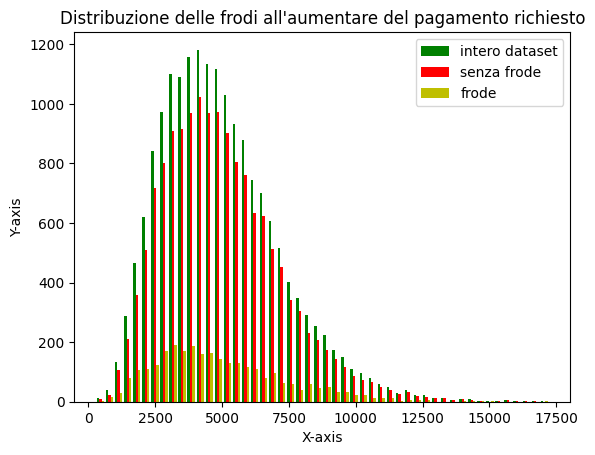

In [14]:
plt.hist(datas, bins=50,color=['g','r','y'],label=['intero dataset','senza frode','frode'])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Distribuzione delle frodi all'aumentare del pagamento richiesto")
plt.legend()

# Parte 2:
## 2.1
Si vuole predire il valore di fraud sulla base degli attributi presenti nel dataset. Ricaricare il dataset originale, eliminare eventuali attributi inutili (giustificare la scelta), eliminare le istanze che contengono valori nulli, rendere tutti gli attributi numerici, e dividerlo in modo che 2/3 degli elementi siano contenuti in un nuovo dataset “train” e 1/3 nel dataset “test”


# Non utilizzare l'accuratezza perchè questo dataset è sbilanciato
usa la recall oppure la f1score ecc...

In [15]:
new_df =  df.copy()

In [16]:
# eliminare gli attributi non utili per la ricerca della predizione della frode
new_df.drop("vehicle_color",axis=1,inplace=True)
# perchè non è utile per la predizione conoscere il colore dell'auto
new_df.drop("claim_day_of_week",axis=1,inplace=True)
# perchè non è utile sapere quando è avvenuto il reclamo per conoscere la predizione
new_df.drop("marital_status",axis=1,inplace=True)
# non è utile conoscere lo stato matrimoniale per prevedere le frodi
new_df.drop("claim_number",axis=1,inplace=True)
# non è utile conoscere il numero del reclamo per prevedere la frode

In [17]:
new_df.drop("high_education_ind",axis=1,inplace=True)
# non è utile conoscere l'educazione della vittima per la predizioni delle frodi

In [18]:
new_df

,age_of_driver,gender,annual_income,address_change_ind,living_status,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_weight,fraud
0,46,M,38301,1,Rent,Local,1,Broker,7530.940993,9.0,Compact,12885.452350,16161.33381,0
1,21,F,30445,1,Rent,Highway,1,Online,2966.024895,4.0,Large,29429.452180,28691.96422,0
2,49,F,38923,1,Own,Local,0,Broker,6283.888333,3.0,Compact,21701.181950,22090.94758,1
3,58,F,40605,0,Own,Local,3,Broker,6169.747994,4.0,Medium,13198.273440,38329.58106,1
4,38,M,36380,0,Rent,Highway,0,Broker,4541.387150,7.0,Medium,38060.211220,25876.56319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,69,M,42338,0,Own,Local,0,Broker,4806.841803,6.0,Medium,32144.571850,16868.53410,0
17994,35,F,35579,1,Own,Local,1,Phone,4089.794471,3.0,Medium,9468.510601,31500.99689,1
17995,27,F,32953,1,Rent,Local,2,Online,2225.803056,5.0,Medium,64974.369590,44536.25506,0
17996,52,F,39519,0,Own,Highway,1,Broker,9560.744844,3.0,Compact,24983.268110,50093.75959,0


In [19]:
new_df.dropna(inplace=True)
new_df

,age_of_driver,gender,annual_income,address_change_ind,living_status,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_weight,fraud
0,46,M,38301,1,Rent,Local,1,Broker,7530.940993,9.0,Compact,12885.452350,16161.33381,0
1,21,F,30445,1,Rent,Highway,1,Online,2966.024895,4.0,Large,29429.452180,28691.96422,0
2,49,F,38923,1,Own,Local,0,Broker,6283.888333,3.0,Compact,21701.181950,22090.94758,1
3,58,F,40605,0,Own,Local,3,Broker,6169.747994,4.0,Medium,13198.273440,38329.58106,1
4,38,M,36380,0,Rent,Highway,0,Broker,4541.387150,7.0,Medium,38060.211220,25876.56319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,69,M,42338,0,Own,Local,0,Broker,4806.841803,6.0,Medium,32144.571850,16868.53410,0
17994,35,F,35579,1,Own,Local,1,Phone,4089.794471,3.0,Medium,9468.510601,31500.99689,1
17995,27,F,32953,1,Rent,Local,2,Online,2225.803056,5.0,Medium,64974.369590,44536.25506,0
17996,52,F,39519,0,Own,Highway,1,Broker,9560.744844,3.0,Compact,24983.268110,50093.75959,0


In [20]:
column_names = new_df.columns

In [21]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()
new_df = ordinal.fit_transform(new_df)
new_df = pd.DataFrame(new_df,columns=column_names)
new_df

,age_of_driver,gender,annual_income,address_change_ind,living_status,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_weight,fraud
0,28.0,1.0,1351.0,1.0,1.0,1.0,1.0,0.0,15718.0,9.0,0.0,3571.0,5840.0,0.0
1,3.0,0.0,57.0,1.0,1.0,0.0,1.0,1.0,3283.0,4.0,1.0,13429.0,13204.0,0.0
2,31.0,0.0,1498.0,1.0,0.0,1.0,0.0,0.0,13528.0,3.0,0.0,9489.0,9785.0,1.0
3,40.0,0.0,1938.0,0.0,0.0,1.0,3.0,0.0,13292.0,4.0,2.0,3768.0,16033.0,1.0
4,20.0,1.0,905.0,0.0,1.0,0.0,0.0,0.0,8559.0,7.0,2.0,16020.0,11900.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17968,51.0,1.0,2373.0,0.0,0.0,1.0,0.0,0.0,9443.0,6.0,2.0,14399.0,6322.0,0.0
17969,17.0,0.0,772.0,1.0,0.0,1.0,1.0,2.0,7002.0,3.0,2.0,1583.0,14264.0,1.0
17970,9.0,0.0,329.0,1.0,1.0,1.0,2.0,1.0,1388.0,5.0,2.0,17870.0,16927.0,0.0
17971,34.0,0.0,1657.0,0.0,0.0,0.0,1.0,0.0,17320.0,3.0,0.0,11367.0,17408.0,0.0


In [22]:
y = new_df["fraud"]
new_df.drop("fraud",axis=1,inplace=True)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df, y,test_size=(1/3),
                                                    random_state=0)
train = X_train.assign(fraud=y_train)
test = X_test.assign(fraud=y_test)
train

,age_of_driver,gender,annual_income,address_change_ind,living_status,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_weight,fraud
6999,13.0,0.0,538.0,1.0,1.0,2.0,1.0,0.0,2701.0,6.0,0.0,8445.0,7320.0,0.0
16530,34.0,0.0,1654.0,0.0,0.0,1.0,0.0,2.0,8299.0,4.0,2.0,10531.0,15509.0,0.0
16006,4.0,1.0,93.0,1.0,1.0,1.0,1.0,2.0,2472.0,3.0,2.0,14801.0,10750.0,0.0
477,29.0,0.0,1396.0,1.0,0.0,0.0,2.0,0.0,5694.0,3.0,2.0,12506.0,17493.0,0.0
15988,30.0,1.0,1467.0,0.0,1.0,2.0,0.0,2.0,689.0,6.0,0.0,1314.0,14642.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,30.0,1.0,1447.0,1.0,0.0,1.0,3.0,2.0,9465.0,3.0,0.0,1889.0,3146.0,0.0
13123,18.0,0.0,802.0,0.0,1.0,1.0,0.0,0.0,8472.0,5.0,1.0,3946.0,949.0,1.0
9845,37.0,0.0,1787.0,0.0,1.0,2.0,1.0,0.0,6450.0,3.0,1.0,14078.0,476.0,0.0
10799,15.0,0.0,639.0,0.0,0.0,1.0,1.0,0.0,1022.0,1.0,2.0,17780.0,17261.0,0.0


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

def test_model(name ,model,train_data, test_data, train_labels, test_labels):
    model.fit(train_data,train_labels)
    train_preds = np.round(model.predict(train_data))
    test_preds = np.round(model.predict(test_data))
    print(f" ===== {name} =====")
    print(f"Accuracy on train {accuracy_score(train_labels, train_preds)}")
    print(f"Accuracy on test {accuracy_score(test_labels, test_preds)}")
    print("Confusion matrix on test")
    print(confusion_matrix(test_labels, test_preds))


classifiers = [DecisionTreeClassifier(), LogisticRegression(), DummyClassifier()]

names = ["DT","LR", "dummy"]

for model,name in zip(classifiers,names):
    test_model(name,model, X_train, X_test, y_train, y_test)

 ===== DT =====
Accuracy on train 1.0
Accuracy on test 0.7342680687698214
Confusion matrix on test
[[4185  836]
 [ 756  214]]
 ===== LR =====
Accuracy on train 0.8462694041061593
Accuracy on test 0.8380904690368887
Confusion matrix on test
[[5021    0]
 [ 970    0]]
 ===== dummy =====
Accuracy on train 0.8462694041061593
Accuracy on test 0.8380904690368887
Confusion matrix on test
[[5021    0]
 [ 970    0]]


Nella matrici di confisione del LR  i valori TN non vengono trovati, gli unici valori che vengono trovati sono i TP e i FP.
Nel DT invece la distribuzione è più omognea anche se l'accuratezza è comunque bassa.
l'accuratezza non è una buona metrica perchè il dataset in questione è sbilanciato nella colonna da predire 

## 2.2
Confrontare l’accuratezza ottenuta nel punto precedente con l’accuratezza si ottiene con un una 10 Fold cross validation

In [25]:
from sklearn.model_selection import cross_val_score
for model,name in zip(classifiers,names):
    scores = cross_val_score(model,new_df,y,cv=10)
    print(f" ===== {name} =====")
    print("media degli accuracy score: ",scores.mean())
    print(scores)

 ===== DT =====
media degli accuracy score:  0.7397768063569055
[0.73081201 0.73025584 0.74972191 0.75459098 0.74513077 0.7345576
 0.73622705 0.74457429 0.7345576  0.73734001]
 ===== LR =====
media degli accuracy score:  0.8431535565084063
[0.84371524 0.84427141 0.84260289 0.84362827 0.84307179 0.84140234
 0.84307179 0.84307179 0.84362827 0.84307179]
 ===== dummy =====
media degli accuracy score:  0.8435431255776065
[0.84371524 0.84315907 0.84315907 0.84362827 0.84362827 0.84362827
 0.84362827 0.84362827 0.84362827 0.84362827]


## 2.3
Trovare i parametri migliori del classificatore Logistic Regression. Agire sui parametri penalty e C. Verificare se l’accuratezza che si ottiene con la nuova configurazione supera quella standard ottenuta al punto 1

In [26]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# utilizzare il GridSearchCV
from sklearn.model_selection import GridSearchCV
params={"penalty":('l1', 'l2', 'elasticnet','none'), "C":[.1,1.0,2.0,.5]}

model_lr = classifiers[1]
grid_model = GridSearchCV(model_lr,params)
grid_model.fit(new_df,y)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 2.0, 0.5],
                         'penalty': ('l1', 'l2', 'elasticnet', 'none')})

In [27]:
grid_model.best_params_

{'C': 0.1, 'penalty': 'none'}

In [28]:
model_lr.set_params(**grid_model.best_params_)
test_model("LR with GridSearch",grid_model,X_train,X_test,y_train,y_test)

 ===== LR with GridSearch =====
Accuracy on train 0.8462694041061593
Accuracy on test 0.8380904690368887
Confusion matrix on test
[[5021    0]
 [ 970    0]]


## 2.4
Introdurre una discretizzazione degli attributi claim_est_payout e vehicle_price, e utilizzare la funzione MaxAbsScaler per scalare i valori del dataset tra 0 e 1 e confrontare se l’accuratezza ottenuta con il Decision Tree Classifier e con la Logistic Regression migliora

In [29]:
new_df.loc[:,('claim_est_payout','vehicle_price')]

,claim_est_payout,vehicle_price
0,15718.0,3571.0
1,3283.0,13429.0
2,13528.0,9489.0
3,13292.0,3768.0
4,8559.0,16020.0
...,...,...
17968,9443.0,14399.0
17969,7002.0,1583.0
17970,1388.0,17870.0
17971,17320.0,11367.0


In [30]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
kbin = KBinsDiscretizer(n_bins=30, strategy="uniform", encode="ordinal")
kbin.fit(pd.DataFrame(new_df.loc[:,('claim_est_payout','vehicle_price')]))

new_df.loc[:,('claim_est_payout','vehicle_price')] = kbin.transform(new_df.loc[:,('claim_est_payout','vehicle_price')])


df_trasform = scaler.fit_transform(new_df)

df_trasform = pd.DataFrame(df_trasform,columns=scaler.feature_names_in_)
df_trasform

,age_of_driver,gender,annual_income,address_change_ind,living_status,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_weight
0,0.325581,1.0,0.502417,1.0,1.0,0.5,0.166667,0.0,0.896552,0.5625,0.0,0.172414,0.324950
1,0.034884,0.0,0.021197,1.0,1.0,0.0,0.166667,0.5,0.172414,0.2500,0.5,0.758621,0.734698
2,0.360465,0.0,0.557084,1.0,0.0,0.5,0.000000,0.0,0.758621,0.1875,0.0,0.517241,0.544458
3,0.465116,0.0,0.720714,0.0,0.0,0.5,0.500000,0.0,0.758621,0.2500,1.0,0.206897,0.892110
4,0.232558,1.0,0.336556,0.0,1.0,0.0,0.000000,0.0,0.482759,0.4375,1.0,0.896552,0.662141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17968,0.593023,1.0,0.882484,0.0,0.0,0.5,0.000000,0.0,0.517241,0.3750,1.0,0.827586,0.351769
17969,0.197674,0.0,0.287096,1.0,0.0,0.5,0.166667,1.0,0.379310,0.1875,1.0,0.068966,0.793679
17970,0.104651,0.0,0.122350,1.0,1.0,0.5,0.333333,0.5,0.068966,0.3125,1.0,1.000000,0.941854
17971,0.395349,0.0,0.616214,0.0,0.0,0.0,0.166667,0.0,0.965517,0.1875,0.0,0.620690,0.968618


In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_trasform, y,test_size=(1/3),
                                                    random_state=0)

classifiers = [DecisionTreeClassifier(), LogisticRegression()]
names = ["DT","LR"]

for model,name in zip(classifiers,names):
    test_model(name,model, X_train, X_test, y_train, y_test)

 ===== DT =====
Accuracy on train 1.0
Accuracy on test 0.7337673176431314
Confusion matrix on test
[[4202  819]
 [ 776  194]]
 ===== LR =====
Accuracy on train 0.8458521115005843
Accuracy on test 0.8372558838257386
Confusion matrix on test
[[5008   13]
 [ 962    8]]


# 2.5
Creare una pipeline in cui si aggiungano al dataset normalizzato due colonne che
rappresentano i valori degli attributi claim_est_payout e vehicle_price discretizzati in 10
intervalli. Si valuti se l’accuratezza migliora utilizzando LogisticRegression come modello

In [32]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.compose import ColumnTransformer

In [35]:
df_trasform

,age_of_driver,gender,annual_income,address_change_ind,living_status,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_weight
0,0.325581,1.0,0.502417,1.0,1.0,0.5,0.166667,0.0,0.896552,0.5625,0.0,0.172414,0.324950
1,0.034884,0.0,0.021197,1.0,1.0,0.0,0.166667,0.5,0.172414,0.2500,0.5,0.758621,0.734698
2,0.360465,0.0,0.557084,1.0,0.0,0.5,0.000000,0.0,0.758621,0.1875,0.0,0.517241,0.544458
3,0.465116,0.0,0.720714,0.0,0.0,0.5,0.500000,0.0,0.758621,0.2500,1.0,0.206897,0.892110
4,0.232558,1.0,0.336556,0.0,1.0,0.0,0.000000,0.0,0.482759,0.4375,1.0,0.896552,0.662141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17968,0.593023,1.0,0.882484,0.0,0.0,0.5,0.000000,0.0,0.517241,0.3750,1.0,0.827586,0.351769
17969,0.197674,0.0,0.287096,1.0,0.0,0.5,0.166667,1.0,0.379310,0.1875,1.0,0.068966,0.793679
17970,0.104651,0.0,0.122350,1.0,1.0,0.5,0.333333,0.5,0.068966,0.3125,1.0,1.000000,0.941854
17971,0.395349,0.0,0.616214,0.0,0.0,0.0,0.166667,0.0,0.965517,0.1875,0.0,0.620690,0.968618


In [33]:
kbin = KBinsDiscretizer(n_bins=10, strategy="uniform", encode="ordinal")

In [40]:
def identity(X):
  return X

Identity = FunctionTransformer(identity, validate=True)

discetizier = ColumnTransformer([("bin_value",kbin,["claim_est_payout", "vehicle_price"])],remainder="passthrough")

union = FeatureUnion([("discretizier",discetizier),("allelse",Identity)])
 
my_pipeline = Pipeline(steps=[("union",union),
                              ("model",LogisticRegression())])

test_model("Scaled Pipeline",my_pipeline, X_train, X_test, y_train, y_test)

 ===== Scaled Pipeline =====
Accuracy on train 0.8458521115005843
Accuracy on test 0.8372558838257386
Confusion matrix on test
[[5008   13]
 [ 962    8]]


# 2.6
Aggiungere alla pipeline la funzione  [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html?highlight=selectkbest#sklearn.feature_selection.SelectKBest) . Utilizzare la funzione di gridSearchCV per
selezionare il K migliore e anche gli intervalli migliori in cui discretizzare i valori di
claim_est_payout e vehicle_price.

In [45]:
from sklearn.feature_selection import SelectKBest

kbest = SelectKBest()

my_pipeline = Pipeline(steps=[("union",union),
                              ("kbest",kbest),
                              ("model",LogisticRegression())])

params={'kbest__k': [10,5,3,"all"],
        'union__discretizier__bin_value__n_bins': [10, 20, 30, 5 ,40]}
gs = GridSearchCV(my_pipeline, params, n_jobs=-1)

test_model("Scaled Pipeline with GridSearch",gs, X_train, X_test, y_train, y_test)

 ===== Scaled Pipeline with GridSearch =====
Accuracy on train 0.8457686529794692
Accuracy on test 0.8372558838257386
Confusion matrix on test
[[5008   13]
 [ 962    8]]


In [46]:
gs.best_params_

{'kbest__k': 'all', 'union__discretizier__bin_value__n_bins': 5}

# 2.7
Creare una nuova pipeline che applichi un simpleImputer (anziché la rimozione delle righe), al
dataset iniziale. Si aggiunga questa pipeline a quella del punto 6 e si valuti la strategia migliore
tra mean, median e most frequent (si decida una configurazione qualsiasi per gli altri
parametri.

In [61]:
new_df = df.copy()
y = new_df["fraud"]
new_df.drop("fraud",axis=1,inplace=True)
new_df.drop([ "claim_number"], inplace=True, axis=1)

column_names = new_df.columns.tolist()

ordinal = OrdinalEncoder()
new_df = ordinal.fit_transform(new_df)
new_df = pd.DataFrame(new_df,columns=column_names)

X_train, X_test, y_train, y_test = train_test_split(new_df, y,test_size=(1/3),
                                                    random_state=0)
new_df

,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight
0,28.0,1.0,1.0,1352.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,15726.0,9.0,0.0,3575.0,6.0,5843.0
1,3.0,0.0,0.0,57.0,0.0,1.0,1.0,4.0,0.0,1.0,1.0,3285.0,4.0,1.0,13446.0,6.0,13214.0
2,31.0,0.0,0.0,1499.0,0.0,1.0,0.0,5.0,1.0,0.0,0.0,13533.0,3.0,0.0,9501.0,6.0,9791.0
3,40.0,0.0,1.0,1939.0,1.0,0.0,0.0,4.0,1.0,3.0,0.0,13297.0,4.0,2.0,3773.0,3.0,16054.0
4,20.0,1.0,1.0,905.0,1.0,0.0,1.0,5.0,0.0,0.0,0.0,8563.0,7.0,2.0,16040.0,2.0,11908.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,51.0,1.0,1.0,2376.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,9448.0,6.0,2.0,14417.0,0.0,6325.0
17994,17.0,0.0,0.0,772.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,7006.0,3.0,2.0,1585.0,1.0,14280.0
17995,9.0,0.0,1.0,329.0,0.0,1.0,1.0,2.0,1.0,2.0,1.0,1389.0,5.0,2.0,17895.0,0.0,16949.0
17996,34.0,0.0,1.0,1658.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,17328.0,3.0,0.0,11382.0,6.0,17430.0


In [62]:
X_train.columns.get_loc("claim_est_payout")

11

In [63]:
from traitlets.traitlets import validate
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()

discretizier = ColumnTransformer([("payout", KBinsDiscretizer(n_bins=30, encode="ordinal", strategy="uniform"), [X_train.columns.get_loc("claim_est_payout")]),
                                  ("vehicle_price", KBinsDiscretizer(n_bins=20, encode="ordinal", strategy="uniform"), [X_train.columns.get_loc("vehicle_price")])])

union = FeatureUnion([("discretizier",discretizier),("allelse",Identity)])

kbest = SelectKBest()

my_old_pipeline = Pipeline(steps=[("union",union),
                              ("kbest",kbest),
                              ("model",LogisticRegression())])

my_pipeline = Pipeline(steps=[("imputer",imputer), ("old_pipeline", my_old_pipeline)])

params={'old_pipeline__kbest__k': [10,5,3,"all"],
        'old_pipeline__union__discretizier__payout__n_bins': [10],
        'old_pipeline__union__discretizier__vehicle_price__n_bins': [5],
        'old_pipeline__model__penalty': ("l1","l2","none"),
        'imputer__strategy':("mean", "median", "most frequent")}

gs = GridSearchCV(my_pipeline, params)

test_model("Scaled Pipeline with GridSearch and SimpleImputer",gs, X_train, X_test, y_train, y_test)


 ===== Scaled Pipeline with GridSearch and SimpleImputer =====
Accuracy on train 0.842723787297883
Accuracy on test 0.8425
Confusion matrix on test
[[5036   24]
 [ 921   19]]


In [64]:
gs.best_params_

{'imputer__strategy': 'mean',
 'old_pipeline__kbest__k': 'all',
 'old_pipeline__model__penalty': 'l2',
 'old_pipeline__union__discretizier__payout__n_bins': 10,
 'old_pipeline__union__discretizier__vehicle_price__n_bins': 5}